In [418]:
import csv
import pandas as pd
DROPBOX_PATH = '/Users/tejav/Dropbox/Data_Int_Fin_Class/rawdata/fx/'

In [419]:
# barclays spot

barclays_spot_83 = pd.read_csv(DROPBOX_PATH + 'barclays_spot_83.csv', skiprows=range(1, 2))
barclays_spot_93 = pd.read_csv(DROPBOX_PATH + 'barclays_spot_93.csv', skiprows=range(1, 2))
barclays_spot_03 = pd.read_csv(DROPBOX_PATH + 'barclays_spot_03.csv', skiprows=range(1, 2))
barclays_spot_09 = pd.read_csv(DROPBOX_PATH + 'barclays_spot_09.csv', skiprows=range(1, 2))

In [420]:
barclays_spot_83.rename(columns={'#ERROR':'EURO TO US $ (BBI) - EXCHANGE RATE'}, inplace=True)

In [421]:
barclays_spot = pd.concat([barclays_spot_83, barclays_spot_93, barclays_spot_03, barclays_spot_09]).drop(columns=['#ERROR'])


In [422]:
barclays_spot_clean = barclays_spot.dropna(axis=0, thresh=0.3*barclays_spot.shape[1])

In [423]:
from datetime import date, timedelta

barclays_spot_clean['Date'] = barclays_spot_clean['Name'].apply(lambda x: date(1900,1,1) + timedelta((int)(x)))
barclays_spot_clean = barclays_spot_clean.set_index('Date')

<ipython-input-423-ab1b1017184e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barclays_spot_clean['Date'] = barclays_spot_clean['Name'].apply(lambda x: date(1900,1,1) + timedelta((int)(x)))


In [424]:
# invert US to UK exchange rate as that is the only one inverted
barclays_spot_clean['US $ TO UK £ (BBI) - EXCHANGE RATE'] = 1.0/barclays_spot_clean['US $ TO UK £ (BBI) - EXCHANGE RATE']
barclays_spot_clean

,Name,US $ TO UK £ (BBI) - EXCHANGE RATE,ITALIAN LIRA TO US $ (BBI) - EXCHANGE RATE,BELGIAN FR.TO US $ SPT FN(BBI) DISC - EXCHANGE RATE,FRENCH FRANC TO US $ (BBI) - EXCHANGE RATE,SWISS FRANC TO US $ (BBI) - EXCHANGE RATE,GERMAN MARK TO US $ (BBI) - EXCHANGE RATE,NETH. GUILDER TO US $ (BBI) - EXCHANGE RATE,JAPANESE YEN TO US $ (BBI) - EXCHANGE RATE,HONG KONG $ TO US $ (BBI) - EXCHANGE RATE,SOUTH AFRICA RAND TO US $ (BBI) - EXCHANGE RATE,CANADIAN $ TO US $ (BBI) - EXCHANGE RATE,SINGAPORE $ TO US $ (BBI) - EXCHANGE RATE,MALAYSIAN RINGGIT TO US $ (BBI) DISC - EXCHANGE RATE,AUSTRALIAN $ TO US $ (BBI) - EXCHANGE RATE,NEW ZEALAND $ TO US $ (BBI) - EXCHANGE RATE,SWEDISH KRONA TO US $ (BBI) - EXCHANGE RATE,NORWEGIAN KRONE TO US $ (BBI - EXCHANGE RATE,DANISH KRONE TO US $ (BBI) - EXCHANGE RATE,EURO TO US $ (BBI) - EXCHANGE RATE
Date,,,,,,,,,,,,,,,,,,,,
1983-10-13,30600.0,0.661244,1572.50,52.65,7.9225,2.0995,2.5830,2.8972,232.325,8.3450,1.1129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-14,30601.0,0.661244,1572.50,52.65,7.9225,2.0995,2.5830,2.8972,232.325,8.3450,1.1129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-15,30602.0,0.666223,1581.50,52.94,7.9635,2.1142,2.6035,2.9177,232.955,8.2450,1.1166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-16,30603.0,0.666889,1587.50,53.26,7.9900,2.1202,2.6175,2.9300,232.925,8.1750,1.1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-19,30606.0,0.666889,1580.50,53.03,7.9535,2.1102,2.6020,2.9160,232.900,8.0250,1.1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-18,44424.0,0.722230,1644.18,NaN,5.5701,0.9123,1.6608,1.8713,109.244,7.7843,14.8242,1.2575,1.3555,NaN,1.3633,1.4261,8.6513,8.8323,6.3144,0.84915
2021-08-19,44425.0,0.728173,1653.08,NaN,5.6002,0.9144,1.6698,1.8814,109.551,7.7923,14.9024,1.2642,1.3627,NaN,1.3798,1.4484,8.7601,8.9167,6.3490,0.85374
2021-08-20,44426.0,0.726586,1652.88,NaN,5.5995,0.9165,1.6696,1.8812,109.851,7.7868,14.9297,1.2634,1.3599,NaN,1.3799,1.4503,8.7212,8.8913,6.3484,0.85364


In [425]:
# barclays forward

barclays_forward_83 = pd.read_csv(DROPBOX_PATH + 'barclays_forward_83.csv', skiprows=range(1, 2))
barclays_forward_93 = pd.read_csv(DROPBOX_PATH + 'barclays_forward_93.csv', skiprows=range(1, 2))
barclays_forward_03 = pd.read_csv(DROPBOX_PATH + 'barclays_forward_03.csv', skiprows=range(1, 2))
barclays_forward_09 = pd.read_csv(DROPBOX_PATH + 'barclays_forward_09.csv', skiprows=range(1, 2))

In [426]:
# total rows
barclays_forward_83.shape[0] + barclays_forward_93.shape[0] + barclays_forward_03.shape[0] + barclays_forward_09.shape[0]

10084

In [427]:
barclays_forward_83.rename(columns={'#ERROR':'EURO TO US $ 1M FWD (BBI) - EXCHANGE RATE'}, inplace=True)

In [428]:
barclays_forward = pd.concat([barclays_forward_83, barclays_forward_93, barclays_forward_03, barclays_forward_09]).drop(columns=['#ERROR', '#ERROR.1', '#ERROR.2', '#ERROR.3', '#ERROR.4', '#ERROR.5'])

In [429]:
barclays_forward_clean = barclays_forward.dropna(axis=0, thresh=0.3*barclays_forward.shape[1])

In [430]:
from datetime import date, timedelta

barclays_forward_clean['Date'] = barclays_forward_clean['Name'].apply(lambda x: date(1900,1,1) + timedelta((int)(x)))

<ipython-input-430-de0aa9051dc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barclays_forward_clean['Date'] = barclays_forward_clean['Name'].apply(lambda x: date(1900,1,1) + timedelta((int)(x)))


In [431]:
barclays_forward_clean = barclays_forward_clean.set_index('Date')

In [432]:
barclays_forward_clean['US $ TO UK £ 1M FWD (BBI) - EXCHANGE RATE'] = 1.0/barclays_forward_clean['US $ TO UK £ 1M FWD (BBI) - EXCHANGE RATE']
barclays_forward_clean

,Name,US $ TO UK £ 1M FWD (BBI) - EXCHANGE RATE,ITL.LIRA TO US $ 1M FWD (BBI) DISC - EXCHANGE RATE,BELGIAN FR.TO US $ 1MF FN(BBI) DISC - EXCHANGE RATE,FRENCH FR. TO US $ 1M FWD(BBI) DISC - EXCHANGE RATE,CHF TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE,GERMAN MARK TO US $ 1M FWD(BBI) DISC - EXCHANGE RATE,NETH. GUILDER TO US $ 1MFWD(BBI)DISC - EXCHANGE RATE,JPY TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE,HONG KONG $ TO US $ 1M FWD (BBI) - EXCHANGE RATE,SOUTH AFRICA RAND TO US $ 1M FWD(BBI) - EXCHANGE RATE,CANADIAN $ TO US $ 1M FWD (BBI) - EXCHANGE RATE,SINGAPORE $ TO US $ 1M FWD (BBI) - EXCHANGE RATE,MALAYSIAN RGT. TO US $ 1M (BBI)DISC' - EXCHANGE RATE,AUD$ TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE,NZD TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE,SEK TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE,NOK TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE,DKK TO US $ 1M FWD (BBI) DISC - EXCHANGE RATE,EURO TO US $ 1M FWD (BBI) - EXCHANGE RATE
Date,,,,,,,,,,,,,,,,,,,,
1983-10-13,30600.0,0.661070,NaN,52.63,7.9477,2.0883,2.5740,2.8882,231.690,8.9450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-14,30601.0,0.661070,NaN,52.63,7.9477,2.0883,2.5740,2.8882,231.690,8.9450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-15,30602.0,0.666001,NaN,52.90,7.9852,2.1034,2.5945,2.9087,232.325,8.6450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-16,30603.0,0.666622,NaN,53.24,8.0125,2.1091,2.6083,2.9210,232.320,8.5750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-19,30606.0,0.666756,NaN,52.99,7.9762,2.0989,2.5925,2.9066,232.270,8.5750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-18,44424.0,0.722178,NaN,NaN,NaN,0.9945,NaN,NaN,110.400,7.7838,14.8922,1.2576,1.3556,NaN,1.3698,1.5153,9.128,8.3636,6.5312,0.84862
2021-08-19,44425.0,0.728120,NaN,NaN,NaN,0.9945,NaN,NaN,110.400,7.7920,14.9677,1.2642,1.3628,NaN,1.3698,1.5153,9.128,8.3636,6.5312,0.85323
2021-08-20,44426.0,0.726533,NaN,NaN,NaN,0.9945,NaN,NaN,110.400,7.7864,14.9922,1.2635,1.3600,NaN,1.3698,1.5153,9.128,8.3636,6.5312,0.85314


In [436]:
barclays_spot_clean.index = pd.to_datetime(barclays_spot_clean.index)
barclays_forward_clean.index = pd.to_datetime(barclays_forward_clean.index)

barclays_spot_new_month = barclays_spot_clean.resample('M').first()
barclays_forward_new_month = barclays_forward_clean.resample('M').first()

barclays_spot_new_month.to_csv(DROPBOX_PATH + 'barclays_monthly_spot.csv')
barclays_forward_new_month.to_csv(DROPBOX_PATH + 'barclays_monthly_forward.csv')

In [397]:
## reuters data

reuters_pre_2008_spot = pd.read_csv(DROPBOX_PATH + 'reuters_spot_pre_2008.csv', skiprows=range(1, 2))
reuters_post_2008_spot = pd.read_csv(DROPBOX_PATH + 'reuters_spot_post_2008.csv', skiprows=range(1, 2))
reuters_spot = pd.concat([reuters_pre_2008_spot, reuters_post_2008_spot])

In [398]:
reuters_spot['Date'] = reuters_spot['Name'].apply(lambda x: date(1900,1,1) + timedelta((int)(x)))
reuters_spot = reuters_spot.set_index('Date')

In [399]:
# invert anything that starts with US in column
for column in reuters_spot.columns:
    if column[:2] == 'US':
        reuters_spot[column] = 1.0/reuters_spot[column]
    

In [400]:
## reuters data

reuters_pre_2008_forward = pd.read_csv(DROPBOX_PATH + 'reuters_forward_pre_2008.csv', skiprows=range(1,2))
reuters_post_2008_forward = pd.read_csv(DROPBOX_PATH + 'reuters_forward_post_2008.csv', skiprows=range(1, 2))
reuters_forward = pd.concat([reuters_pre_2008_forward, reuters_post_2008_forward])

In [401]:
reuters_forward['Date'] = reuters_forward['Name'].apply(lambda x: date(1900,1,1) + timedelta((int)(x)))
reuters_forward = reuters_forward.set_index('Date')

In [402]:
# invert anything that starts with US in column
for column in reuters_forward.columns:
    if column[:2] == 'US':
        reuters_forward[column] = 1.0/reuters_forward[column]

In [403]:
reuters_forward.shape

(6430, 41)

In [404]:
## combine reuters forward and spot

columns_spot = []
columns_forward = []
for column in reuters_spot:
    for column2 in reuters_forward:
        if column[:10] == column2[:10]:
            if column not in columns_spot:
                columns_spot.append(column)
                columns_forward.append(column2)

            



In [405]:
reuters_spot_new = reuters_spot[columns_spot]
reuters_forward_new = reuters_forward[columns_forward]

In [406]:
reuters_spot_new.columns.tolist()

['Name',
 'US $ TO AUSTRALIAN $ (WMR) - EXCHANGE RATE',
 'AUSTRIAN SCHIL.TO US $ (WMR) - EXCHANGE RATE',
 'BELGIAN FRANC TO US $ (WMR) - EXCHANGE RATE',
 'CANADIAN $ TO US $ (WMR) - EXCHANGE RATE',
 'CZECH KORUNA TO US $ (WMR) - EXCHANGE RATE',
 'DANISH KRONE TO US $ (WMR) - EXCHANGE RATE',
 'FINNISH MARKKA TO US $ (WMR) - EXCHANGE RATE',
 'FRENCH FRANC TO US $ (WMR) - EXCHANGE RATE',
 'GERMAN MARK TO US $ (WMR) - EXCHANGE RATE',
 'GREEK DRACHMA TO US $ (WMR) - EXCHANGE RATE',
 'HONG KONG $ TO US $ (WMR) - EXCHANGE RATE',
 'HUNGARIAN FORINT TO US $ (WMR) - EXCHANGE RATE',
 'INDIAN RUPEE TO US $ (WMR) - EXCHANGE RATE',
 'INDONESIAN RUPIAH TO US $ (WMR) - EXCHANGE RATE',
 'US $ TO IRISH PUNT $(WMR) - EXCHANGE RATE',
 'ITALIAN LIRA TO US $ (WMR) - EXCHANGE RATE',
 'JAPANESE YEN TO US $ (WMR) - EXCHANGE RATE',
 'MALAYSIAN RINGGIT TO US $ (WMR) - EXCHANGE RATE',
 'MEXICAN PESO TO US $ (WMR) - EXCHANGE RATE',
 'NETH. GUILDER TO US $ (WMR) - EXCHANGE RATE',
 'US $ TO NEW ZEALAND $ (WMR) - EXC

<AxesSubplot:xlabel='Date'>

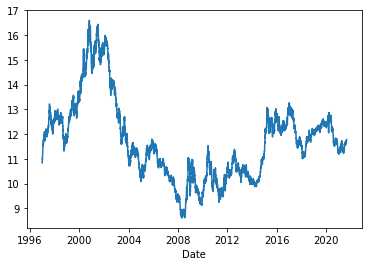

In [407]:
reuters_spot_new['AUSTRIAN SCHIL.TO US $ (WMR) - EXCHANGE RATE'].plot()

In [408]:
reuters_spot_new.to_csv(DROPBOX_PATH + 'reuters_spot_daily.csv')
reuters_forward_new.to_csv(DROPBOX_PATH + 'reuters_forward_daily.csv')

In [409]:
reuters_spot_new.index = pd.to_datetime(reuters_spot_new.index)
reuters_spot_new_month = reuters_spot_new.resample('M').first()
reuters_spot_new_month

,Name,US $ TO AUSTRALIAN $ (WMR) - EXCHANGE RATE,AUSTRIAN SCHIL.TO US $ (WMR) - EXCHANGE RATE,BELGIAN FRANC TO US $ (WMR) - EXCHANGE RATE,CANADIAN $ TO US $ (WMR) - EXCHANGE RATE,CZECH KORUNA TO US $ (WMR) - EXCHANGE RATE,DANISH KRONE TO US $ (WMR) - EXCHANGE RATE,FINNISH MARKKA TO US $ (WMR) - EXCHANGE RATE,FRENCH FRANC TO US $ (WMR) - EXCHANGE RATE,GERMAN MARK TO US $ (WMR) - EXCHANGE RATE,...,SINGAPORE $ TO US $ (WMR) - EXCHANGE RATE,SOUTH AFRICA RAND TO US $ (WMR) - EXCHANGE RATE,SOUTH KOREAN WON TO US $ (WMR) - EXCHANGE RATE,SPANISH PESETA TO US $ (WMR) - EXCHANGE RATE,SWISS FRANC TO US $ (WMR) - EXCHANGE RATE,TAIWAN NEW $ TO US $ (WMR) - EXCHANGE RATE,THAI BAHT TO US $ (WMR) - EXCHANGE RATE,NEW TURKISH LIRA TO US $ (WMR) - EXCHANGE RATE,UAE DIRHAM TO US $ (WMR) - EXCHANGE RATE,US $ TO UK £ (WMR) - EXCHANGE RATE
Date,,,,,,,,,,,,,,,,,,,,,
1997-01-31,35430.0,1.258970,10.83950,31.7645,1.37070,27.22800,5.89890,4.60900,5.19880,1.54110,...,1.39880,4.67750,845.50,130.0750,1.34280,27.5000,25.64000,0.10909,3.67230,0.584351
1997-02-28,35460.0,1.307019,11.53660,33.8300,1.34710,27.79550,6.25740,4.87250,5.53310,1.63940,...,1.40750,4.56500,864.75,138.4250,1.42500,27.4400,25.95900,0.11588,3.67200,0.619387
1997-03-31,35488.0,1.284027,11.89210,34.8500,1.36600,28.86900,6.44490,5.03190,5.69970,1.68970,...,1.42550,4.47100,864.00,143.2750,1.47890,27.5200,25.88500,0.12226,3.67200,0.614590
1997-04-30,35520.0,1.275673,11.74230,34.4855,1.38150,29.01800,6.35590,4.95280,5.62850,1.66840,...,1.44530,4.42050,895.50,141.7700,1.44060,27.5400,25.97500,0.12766,3.67280,0.609013
1997-05-31,35549.0,1.280082,12.13900,35.5900,1.39800,30.89200,6.56560,5.20410,5.81580,1.72480,...,1.44450,4.44080,893.00,145.6050,1.46680,27.6700,26.11500,0.13523,3.67300,0.613008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,44285.0,1.315876,11.73340,34.3977,1.26290,22.30020,6.34200,5.06995,5.59330,1.66770,...,1.34790,14.91380,1133.55,141.8768,0.94315,28.5035,31.25500,8.31825,3.67315,0.729315
2021-05-31,44315.0,1.287581,11.36085,33.3058,1.22940,21.36150,6.13935,4.90900,5.41575,1.61480,...,1.32650,14.30000,1108.25,137.3729,0.91105,27.9330,31.21500,8.21875,3.67315,0.717051
2021-06-30,44347.0,1.291906,11.25450,32.9939,1.20810,20.80975,6.08295,4.86300,5.36505,1.59970,...,1.32095,13.72000,1111.05,136.0864,0.89935,27.6050,31.23500,8.47675,3.67290,0.703482


In [410]:
reuters_forward_new.index = pd.to_datetime(reuters_forward_new.index)
reuters_forward_new_month = reuters_forward_new.resample('M').first()
reuters_forward_new_month

,Name,US $ TO AUSTRALIAN $ 1M FWD (WMR) - EXCHANGE RATE,AUSTRIAN SCHIL.TO US $ 1M FWD (WMR - EXCHANGE RATE,BELGIAN FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE,CANADIAN $ TO US $ 1M FWD (WMR) - EXCHANGE RATE,CZECH KORUNA TO US $ 1M FWD (WMR) - EXCHANGE RATE,DANISH KRONE TO US $ 1M FWD (WMR) - EXCHANGE RATE,FINNISH MARKKA TO US $ 1M FWD (WMR) - EXCHANGE RATE,FRENCH FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE,GERMAN MARK TO US $ 1M FWD (WMR) - EXCHANGE RATE,...,SINGAPORE $ TO US $ 1M FWD (WMR) - EXCHANGE RATE,SOUTH AFRICA RAND TO US $ 1M FWD(WMR) - EXCHANGE RATE,SOUTH KOREAN WON TO US$ 1M FWD (WMR) - EXCHANGE RATE,SPANISH PESETA TO US $ 1M FWD (WMR) - EXCHANGE RATE,SWISS FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE,TAIWAN NEW $ TO US $ 1M FWD (WMR) - EXCHANGE RATE,THAI BAHT TO US $ 1M FWD (WMR) - EXCHANGE RATE,NEW TURKISH LIRA TO US $ 1M FWD - EXCHANGE RATE,UAE DIRHAM TO US $ 1M FWD (WMR) - EXCHANGE RATE,US $ TO UK £ 1M FWD (WMR) - EXCHANGE RATE
Date,,,,,,,,,,,,,,,,,,,,,
1997-01-31,35430.0,1.259525,10.81975,31.6938,1.36794,27.3889,5.88925,4.59925,5.18935,1.53798,...,1.39685,4.72600,NaN,130.1798,1.33855,27.5110,25.7400,0.11596,3.67280,0.584724
1997-02-28,35460.0,1.307497,11.51660,33.7685,1.34467,27.9442,6.24860,4.86355,5.52415,1.63652,...,1.40470,4.60650,NaN,138.5075,1.42095,27.4510,26.0740,0.12197,3.67215,0.619725
1997-03-31,35488.0,1.284604,11.87050,34.7930,1.36363,29.0431,6.43505,5.02165,5.68935,1.68667,...,1.42415,4.51350,NaN,143.3733,1.47432,27.5310,25.9900,0.12830,3.67225,0.614927
1997-04-30,35520.0,1.276210,11.72005,34.4180,1.37865,29.1810,6.34515,4.94105,5.61710,1.66495,...,1.44365,4.45950,NaN,141.7930,1.43602,27.5510,26.0525,0.13469,3.67310,0.609217
1997-05-31,35549.0,1.280541,12.11650,35.5155,1.39513,31.0685,6.55345,5.19215,5.80420,1.72113,...,1.44290,4.47980,NaN,145.5925,1.46176,27.6810,26.1575,0.14299,3.67330,0.613331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,44285.0,1.315668,11.72523,34.3739,1.26280,22.2986,6.33880,5.06640,5.58945,1.66658,...,1.34816,14.97890,1133.70,141.7785,0.94231,28.4990,31.2585,NaN,3.67323,0.729219
2021-05-31,44315.0,1.287416,11.35398,33.2855,1.22936,21.3613,6.13627,4.90598,5.41248,1.61381,...,1.32664,14.36155,1108.35,137.2894,0.91033,27.9325,31.2215,NaN,3.67313,0.717005
2021-06-30,44347.0,1.291723,11.24798,32.9748,1.20816,20.8101,6.08019,4.86018,5.36194,1.59874,...,1.32107,13.77510,1110.95,136.0077,0.89866,27.6020,31.2380,NaN,3.67297,0.703453


In [411]:
reuters_spot_new_month.to_csv(DROPBOX_PATH + 'reuters_spot_monthly.csv')
reuters_forward_new_month.to_csv(DROPBOX_PATH + 'reuters_forward_monthly.csv')

In [412]:
## combine the two data sets

barclays_spot_clean.index = pd.to_datetime(barclays_spot_clean.index)
barclays_forward_clean.index = pd.to_datetime(barclays_forward_clean.index)
barclays_spot_clean_pre = barclays_spot_clean[:'12-31-1996']
barclays_forward_clean_pre = barclays_forward_clean[:'12-31-1996']

In [413]:
#barclays_forward_clean_pre.columns = [x.split('(')[0] for x in barclays_forward_clean_pre.columns.tolist()]
barclays_spot_clean_pre.columns = [x.split('(')[0] for x in barclays_spot_clean_pre.columns.tolist()]
#reuters_forward_new.columns = [x.split('(')[0] for x in reuters_forward_new.columns.tolist()]
reuters_spot_new.columns = [x.split('(')[0] for x in reuters_spot_new.columns.tolist()]


In [414]:
spot_df = pd.concat([barclays_spot_clean_pre, reuters_spot_new])


In [415]:
spot_df

,Name,US $ TO UK £,ITALIAN LIRA TO US $,BELGIAN FR.TO US $ SPT FN,FRENCH FRANC TO US $,SWISS FRANC TO US $,GERMAN MARK TO US $,NETH. GUILDER TO US $,JAPANESE YEN TO US $,HONG KONG $ TO US $,...,PHILIPPINE PESO TO US $,POLISH ZLOTY TO US $,PORTUGUESE ESCUDO TO US $,SAUDI RIYAL TO US $,SOUTH KOREAN WON TO US $,SPANISH PESETA TO US $,TAIWAN NEW $ TO US $,THAI BAHT TO US $,NEW TURKISH LIRA TO US $,UAE DIRHAM TO US $
Date,,,,,,,,,,,,,,,,,,,,,
1983-10-13,30600.0,0.661244,1572.500,52.65,7.92250,2.09950,2.58300,2.89720,232.325,8.34500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-14,30601.0,0.661244,1572.500,52.65,7.92250,2.09950,2.58300,2.89720,232.325,8.34500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-15,30602.0,0.666223,1581.500,52.94,7.96350,2.11420,2.60350,2.91770,232.955,8.24500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-16,30603.0,0.666889,1587.500,53.26,7.99000,2.12020,2.61750,2.93000,232.925,8.17500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-19,30606.0,0.666889,1580.500,53.03,7.95350,2.11020,2.60200,2.91600,232.900,8.02500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-18,44424.0,0.721475,1642.508,NaN,5.56440,0.91115,1.65910,1.86935,109.145,7.78450,...,50.635,3.87045,170.0658,3.7505,1169.05,141.1427,27.8390,33.4275,8.47450,3.67315
2021-08-19,44425.0,0.727908,1652.601,NaN,5.59860,0.91455,1.66930,1.88085,109.600,7.79105,...,50.411,3.89610,171.1108,3.7505,1176.25,142.0100,27.8555,33.2700,8.43700,3.67310
2021-08-20,44426.0,0.726903,1653.307,NaN,5.60095,0.91775,1.67000,1.88165,109.895,7.78620,...,50.425,3.89040,171.1839,3.7504,1168.60,142.0706,27.8175,33.2900,8.47350,3.67315


In [416]:
barclays_forward_clean_pre.columns = ['US $ TO UK £ 1M FWD (WMR) - EXCHANGE RATE',
                                     'ITALIAN LIRA TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'BELGIAN FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'FRENCH FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'SWISS FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'GERMAN MARK TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'NETH. GUILDER TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'JAPANESE YEN TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'HONG KONG $ TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'SOUTH AFRICA RAND TO US $ 1M FWD(WMR) - EXCHANGE RATE',
                                     'CANADIAN $ TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'SINGAPORE $ TO US $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'MALAYSIAN RINGGIT TO US $ 1M FWD(WMR) - EXCHANGE RATE',
                                     'US $ TO AUSTRALIAN $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'US $ TO NEW ZEALAND $ 1M FWD (WMR) - EXCHANGE RATE',
                                     'SEK TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE',
                                     'NORWEGIAN KRONE TO US $ 1M FWD(WMR) - EXCHANGE RATE',
                                     'DANISH KRONE TO US $ 1M FWD (WMR) - EXCHANGE RATE']

['Name',
 'US $ TO UK £ 1M FWD (BBI) - EXCHANGE RATE',
 'ITL.LIRA TO US $ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'BELGIAN FR.TO US $ 1MF FN(BBI) DISC - EXCHANGE RATE',
 'FRENCH FR. TO US $ 1M FWD(BBI) DISC - EXCHANGE RATE',
 'CHF TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'GERMAN MARK TO US $ 1M FWD(BBI) DISC - EXCHANGE RATE',
 'NETH. GUILDER TO US $ 1MFWD(BBI)DISC - EXCHANGE RATE',
 'JPY TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'HONG KONG $ TO US $ 1M FWD (BBI) - EXCHANGE RATE',
 'SOUTH AFRICA RAND TO US $ 1M FWD(BBI) - EXCHANGE RATE',
 'CANADIAN $ TO US $ 1M FWD (BBI) - EXCHANGE RATE',
 'SINGAPORE $ TO US $ 1M FWD (BBI) - EXCHANGE RATE',
 "MALAYSIAN RGT. TO US $ 1M (BBI)DISC' - EXCHANGE RATE",
 'AUD$ TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'NZD TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'SEK TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'NOK TO US$ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'DKK TO US $ 1M FWD (BBI) DISC - EXCHANGE RATE',
 'EURO TO US $ 1M FWD (BBI) - EXCHANGE RATE']

In [417]:
reuters_forward_new.columns.tolist()

['Name',
 'US $ TO AUSTRALIAN $ 1M FWD (WMR) - EXCHANGE RATE',
 'AUSTRIAN SCHIL.TO US $ 1M FWD (WMR - EXCHANGE RATE',
 'BELGIAN FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'CANADIAN $ TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'CZECH KORUNA TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'DANISH KRONE TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'FINNISH MARKKA TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'FRENCH FRANC TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'GERMAN MARK TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'GREEK DRACHMA TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'HONG KONG $ TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'HUNGARIAN HUF TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'INDIAN RUPEE TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'INDONESIAN RUPIAH TO US $ 1M FWD - EXCHANGE RATE',
 'US $ TO IRISH PUNT 1M FWD (WMR) - EXCHANGE RATE',
 'ITALIAN LIRA TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'JAPANESE YEN TO US $ 1M FWD (WMR) - EXCHANGE RATE',
 'MALAYSIAN RINGGIT TO US $ 1M FWD(WMR) - EXCHANGE RATE',
 'MEXICAN PESO T